# Activity 3: Higher Order Systems

For this unit the focus is on higher order systems of differential equations. We've already encountered one of these in Acitivty 2 with the mass on a spring. This was a *second* *order* *system* since the rate of change of position was equal to the velocity, and the rate of change of the velocity depended on the position. Let's remind ourselves how that worked:

1) (definition of $v$)

$$ \frac{dx}{dt} = v $$ 

2) Since the spring force is $F=-kx$, but $F = ma = m dv/dt \rightarrow a = -k x/m$ but $a=dv/dt$ so that means:

$$ \frac{dv}{dt} = -k x/m $$

But note that $dv/dt$ can also be written as $d^2x/dt^2$ so:

$$ \frac{d^2x}{dt^2} + k x/m = 0 $$

which is clearly a second order system since the highest derivative is a second derivative.

So, that means we can think of a second order system as a single equation whose highest derivative is a second dirivative, or we can think of it as two coupled first order systems. One advantage of thinking of a complicated system as a collection of coupled first order systems is that the numerical methods we developed in Acivity 2 are easily generalized to handle many coupled first order system, it's not so easy to apply them to a single higher order differential equation.

## Sympy

This activity will focus on learning some new computer tools that will help us to solve higher order systems analytically. We'll by using a python package called [sympy](https://www.sympy.org/en/index.html). Follow along here as we practice solving higher order systems analytically with sympy.

First: Import the sympy library:

In [2]:
import sympy as sp

Next, let's define two general purpose symbolic variables $A$ and $s$ that can be anything.

We'll also define a symbolic variable, $t$, that will certainly be *real*.

In [3]:
A,s = sp.symbols("A,s")
t = sp.symbols("t", real=True)

Suppose we have a differential equation:

$$ f''(t) + 3 f'(t) + 7 f(t) = 0 $$

Next, suppose we decide to try a potential solution $f$ that's a function built from the variables we've already defined:

In [17]:
f = A*sp.exp(s*t)

To get the derivative of a function in `sympy` we can use the `diff` method. Let's use this method to substitute our proposed solution into the differential equation to see what we get:

In [18]:
de = f.diff(t).diff(t) + 3*f.diff(t) + 7*f
de

A*s**2*exp(s*t) + 3*A*s*exp(s*t) + 7*A*exp(s*t)

Oh! Interesting. Note the common factors of $A$ and $e^{st}$! We can ask `sympy` to factor those out:

In [21]:
sp.factor(de)

A*(s**2 + 3*s + 7)*exp(s*t)

Note that since $e^{st}$ is never zero, and $A$ is only zero in the trivial solution (where $f$ is zero everywhen) the only non-trivial solutions are when $s^2 + 3s + 7 = 0$. We can use `sympy` to solve for those values of $s$ like this:

In [22]:
sols = sp.solve(de,s)
sols

[-3/2 - sqrt(19)*I/2, -3/2 + sqrt(19)*I/2]

So! There are only two values of $s$ that solve this equation: $s=-3/2 - i \sqrt{19}/2$ and $s=-3/2 + i \sqrt{19}/2$.

Note that in `sympy` the constant `I` is our old friend $i=\sqrt{-1}$.

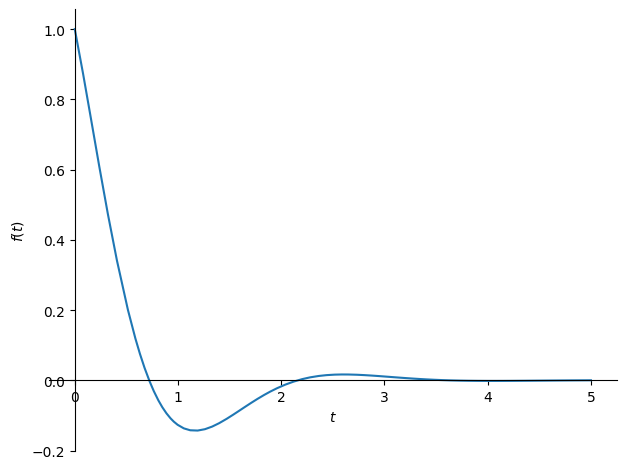

In [8]:
sp.plot(sp.re(f.subs(s,sols[0]).subs(A,1)),(t,0,5))

In [9]:
sp.re(f.subs(s,sols[0]).subs(A,1))

exp(-3*t/2)*cos(sqrt(19)*t/2)

In [10]:
%reset 
# clear memory and start over

Nothing done.


In [11]:
import sympy as sp

In [12]:
f = sp.symbols("f", cls=sp.Function)
t = sp.symbols("t", real=True)

In [13]:
soln = sp.dsolve(f(t).diff(t,t) + 9*f(t),f(t), ics={f(0):1, f(t).diff(t).subs(t,0):1})
soln

Eq(f(t), sin(3*t)/3 + cos(3*t))

In [14]:
soln.rhs

sin(3*t)/3 + cos(3*t)

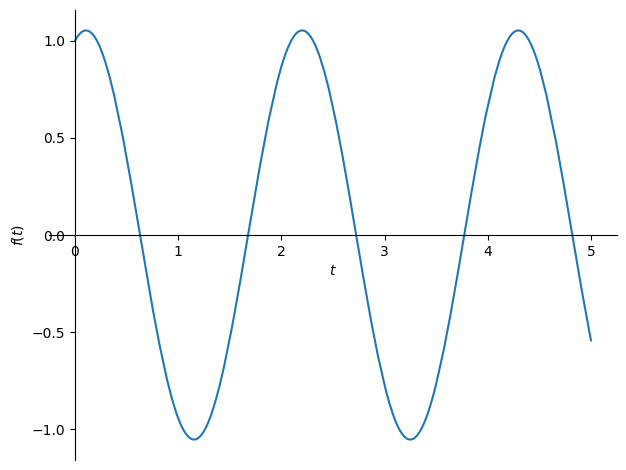

In [15]:
sp.plot(soln.rhs,(t,0,5))